Dataset

The BACE dataset provides quantitative (pIC50) and qualitative (class) binding results for set of inhibitors of human beta-secretase1

data is available at http://moleculenet.ai/datasets-1


In [634]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [586]:
data = pd.read_csv("bace.csv")
data

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [587]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Columns: 595 entries, mol to canvasUID
dtypes: float64(210), int64(382), object(3)
memory usage: 6.9+ MB


Preprocessing

(Missing Values, Duplicate Rows)

In [588]:
data1 = data[data.pIC50.notna()]
data11 = data[data.mol.notna()]
len(data1)
len(data11)

1513

In [589]:
data2 = data.drop_duplicates(['mol'])
len(data2)

1513

SMILES

(Simplified Molecular Input Line Entry System)

In [591]:
data.mol

0       O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...
1       Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...
2       S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
3       S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...
4       S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
                              ...                        
1508            Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N
1509            Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N
1510               Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1
1511         O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N
1512                  Clc1cc2nc(n(c2cc1)CCCC(=O)NCC1CC1)N
Name: mol, Length: 1513, dtype: object

In [592]:
from rdkit import Chem

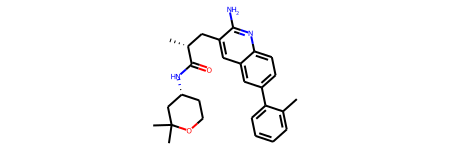

In [593]:
Chem.MolFromSmiles(data.mol[0])

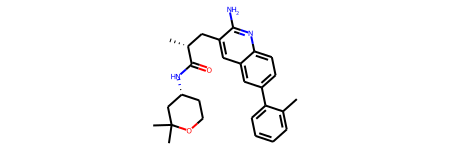

In [594]:
m = Chem.MolFromSmiles('O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2ccccc2C)C)CC1(C)C')
m

In [595]:
mol_list= []
for element in data.mol:
    mol = Chem.MolFromSmiles(element)
    mol_list.append(mol)
    
mol_list[:3]

Discriptors:

cLogP Octanol-water partition coefficient

MW Molecular weight

RB Number of rotatable bonds

AP Aromatic proportion = (number of aromatic atoms / total number of heavy atoms)

-for the AP descriptor, we will calculate this by manually computing the ratio of the number of aromatic atoms to the total number of heavy atoms which rdkit can compute.

HD Hydrogen Bond Donors

HA Hydrogen Bond Acceptors

In [596]:
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

In [597]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
    
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
    
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds,
                        desc_NumHDonors,
                        desc_NumHAcceptors])  
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [598]:
df = generate(data.mol)
df

,MolLogP,MolWt,NumRotatableBonds,NumHDonors,NumHAcceptors
0,5.04482,431.580,5.0,2.0,4.0
1,2.63860,657.823,16.0,4.0,5.0
2,2.45750,591.754,11.0,3.0,6.0
3,3.13180,591.688,10.0,3.0,6.0
4,3.46770,629.725,10.0,3.0,5.0
...,...,...,...,...,...
1508,3.15590,364.877,6.0,2.0,5.0
1509,3.32450,357.845,6.0,2.0,5.0
1510,2.39610,320.190,2.0,1.0,4.0
1511,3.30060,317.392,3.0,1.0,4.0


In [599]:
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
#aromatic_atoms

In [600]:
# Inspired by: https://github.com/dataprofessor/code/blob/master/python
def AromaticAtoms(m):
    aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aa_count = []
    for i in aromatic_atoms:
        if i==True:
            aa_count.append(1)
    sum_aa_count = sum(aa_count)
    return sum_aa_count

In [601]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
#desc_AromaticAtoms

In [602]:
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
#desc_HeavyAtomCount

In [603]:
desc_AromaticProp = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
#desc_AromaticProp

In [604]:
df_desc_AromaticProp = pd.DataFrame(desc_AromaticProp, columns=['AromaticProp'])
df_desc_AromaticProp

,AromaticProp
0,0.500000
1,0.255319
2,0.500000
3,0.300000
4,0.477273
...,...
1508,0.360000
1509,0.600000
1510,0.631579
1511,0.750000


In [605]:
df_others = data.iloc[:,14:18]
df_others

,PSA,Estate,MR,Polar
0,77.239998,67.251999,129.903900,58.397999
1,124.580000,115.417000,173.617600,76.254997
2,125.860000,96.585999,160.124210,75.639000
3,123.840000,112.751000,144.271190,63.681999
4,116.630000,116.336000,159.634700,74.728996
...,...,...,...,...
1508,82.169998,55.612000,97.397301,42.459999
1509,85.830002,57.445999,96.188499,45.092999
1510,60.910000,43.250999,78.611504,35.228001
1511,60.910000,52.167999,96.124901,45.526001


Define X&Y

In [606]:
X = pd.concat([df,df_desc_AromaticProp,df_others], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,NumHDonors,NumHAcceptors,AromaticProp,PSA,Estate,MR,Polar
0,5.04482,431.580,5.0,2.0,4.0,0.500000,77.239998,67.251999,129.903900,58.397999
1,2.63860,657.823,16.0,4.0,5.0,0.255319,124.580000,115.417000,173.617600,76.254997
2,2.45750,591.754,11.0,3.0,6.0,0.500000,125.860000,96.585999,160.124210,75.639000
3,3.13180,591.688,10.0,3.0,6.0,0.300000,123.840000,112.751000,144.271190,63.681999
4,3.46770,629.725,10.0,3.0,5.0,0.477273,116.630000,116.336000,159.634700,74.728996
...,...,...,...,...,...,...,...,...,...,...
1508,3.15590,364.877,6.0,2.0,5.0,0.360000,82.169998,55.612000,97.397301,42.459999
1509,3.32450,357.845,6.0,2.0,5.0,0.600000,85.830002,57.445999,96.188499,45.092999
1510,2.39610,320.190,2.0,1.0,4.0,0.631579,60.910000,43.250999,78.611504,35.228001
1511,3.30060,317.392,3.0,1.0,4.0,0.750000,60.910000,52.167999,96.124901,45.526001


In [607]:
data.head()

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5


(array([ 23.,  62., 125., 204., 266., 340., 362., 114.,  16.,   1.]),
 array([ 2.5445461 ,  3.34237939,  4.14021268,  4.93804597,  5.73587926,
         6.53371255,  7.33154584,  8.12937913,  8.92721242,  9.72504571,
        10.522879  ]),
 <BarContainer object of 10 artists>)

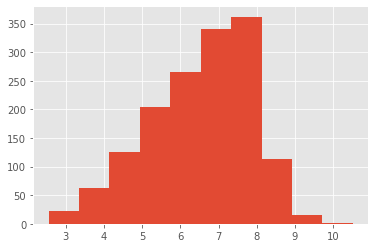

In [951]:
plt.hist(Y2)

In [608]:
Y1 = data.iloc[:,2]
Y2 = data.iloc[:,4]
Y = pd.concat([Y1,Y2], axis=1)
Y

,Class,pIC50
0,1,9.154901
1,1,8.853872
2,1,8.698970
3,1,8.698970
4,1,8.698970
...,...,...
1508,0,3.000000
1509,0,3.000000
1510,0,2.953115
1511,0,2.733298


In [609]:
Y1.value_counts()

0    822
1    691
Name: Class, dtype: int64

<AxesSubplot:>

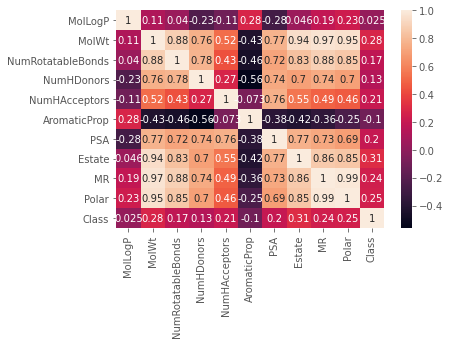

In [610]:
df_ = pd.concat([X,Y1], axis = 1)
sns.heatmap(df_.corr(), annot = True)

There is a high correlation between Polar,molwt and MR
So it is better to drop MR to avoid multicollinearity


In [611]:
X.drop("MR", axis = 1)
df_.drop("MR", axis = 1)

,MolLogP,MolWt,NumRotatableBonds,NumHDonors,NumHAcceptors,AromaticProp,PSA,Estate,Polar,Class
0,5.04482,431.580,5.0,2.0,4.0,0.500000,77.239998,67.251999,58.397999,1
1,2.63860,657.823,16.0,4.0,5.0,0.255319,124.580000,115.417000,76.254997,1
2,2.45750,591.754,11.0,3.0,6.0,0.500000,125.860000,96.585999,75.639000,1
3,3.13180,591.688,10.0,3.0,6.0,0.300000,123.840000,112.751000,63.681999,1
4,3.46770,629.725,10.0,3.0,5.0,0.477273,116.630000,116.336000,74.728996,1
...,...,...,...,...,...,...,...,...,...,...
1508,3.15590,364.877,6.0,2.0,5.0,0.360000,82.169998,55.612000,42.459999,0
1509,3.32450,357.845,6.0,2.0,5.0,0.600000,85.830002,57.445999,45.092999,0
1510,2.39610,320.190,2.0,1.0,4.0,0.631579,60.910000,43.250999,35.228001,0
1511,3.30060,317.392,3.0,1.0,4.0,0.750000,60.910000,52.167999,45.526001,0


<Figure size 1080x504 with 0 Axes>

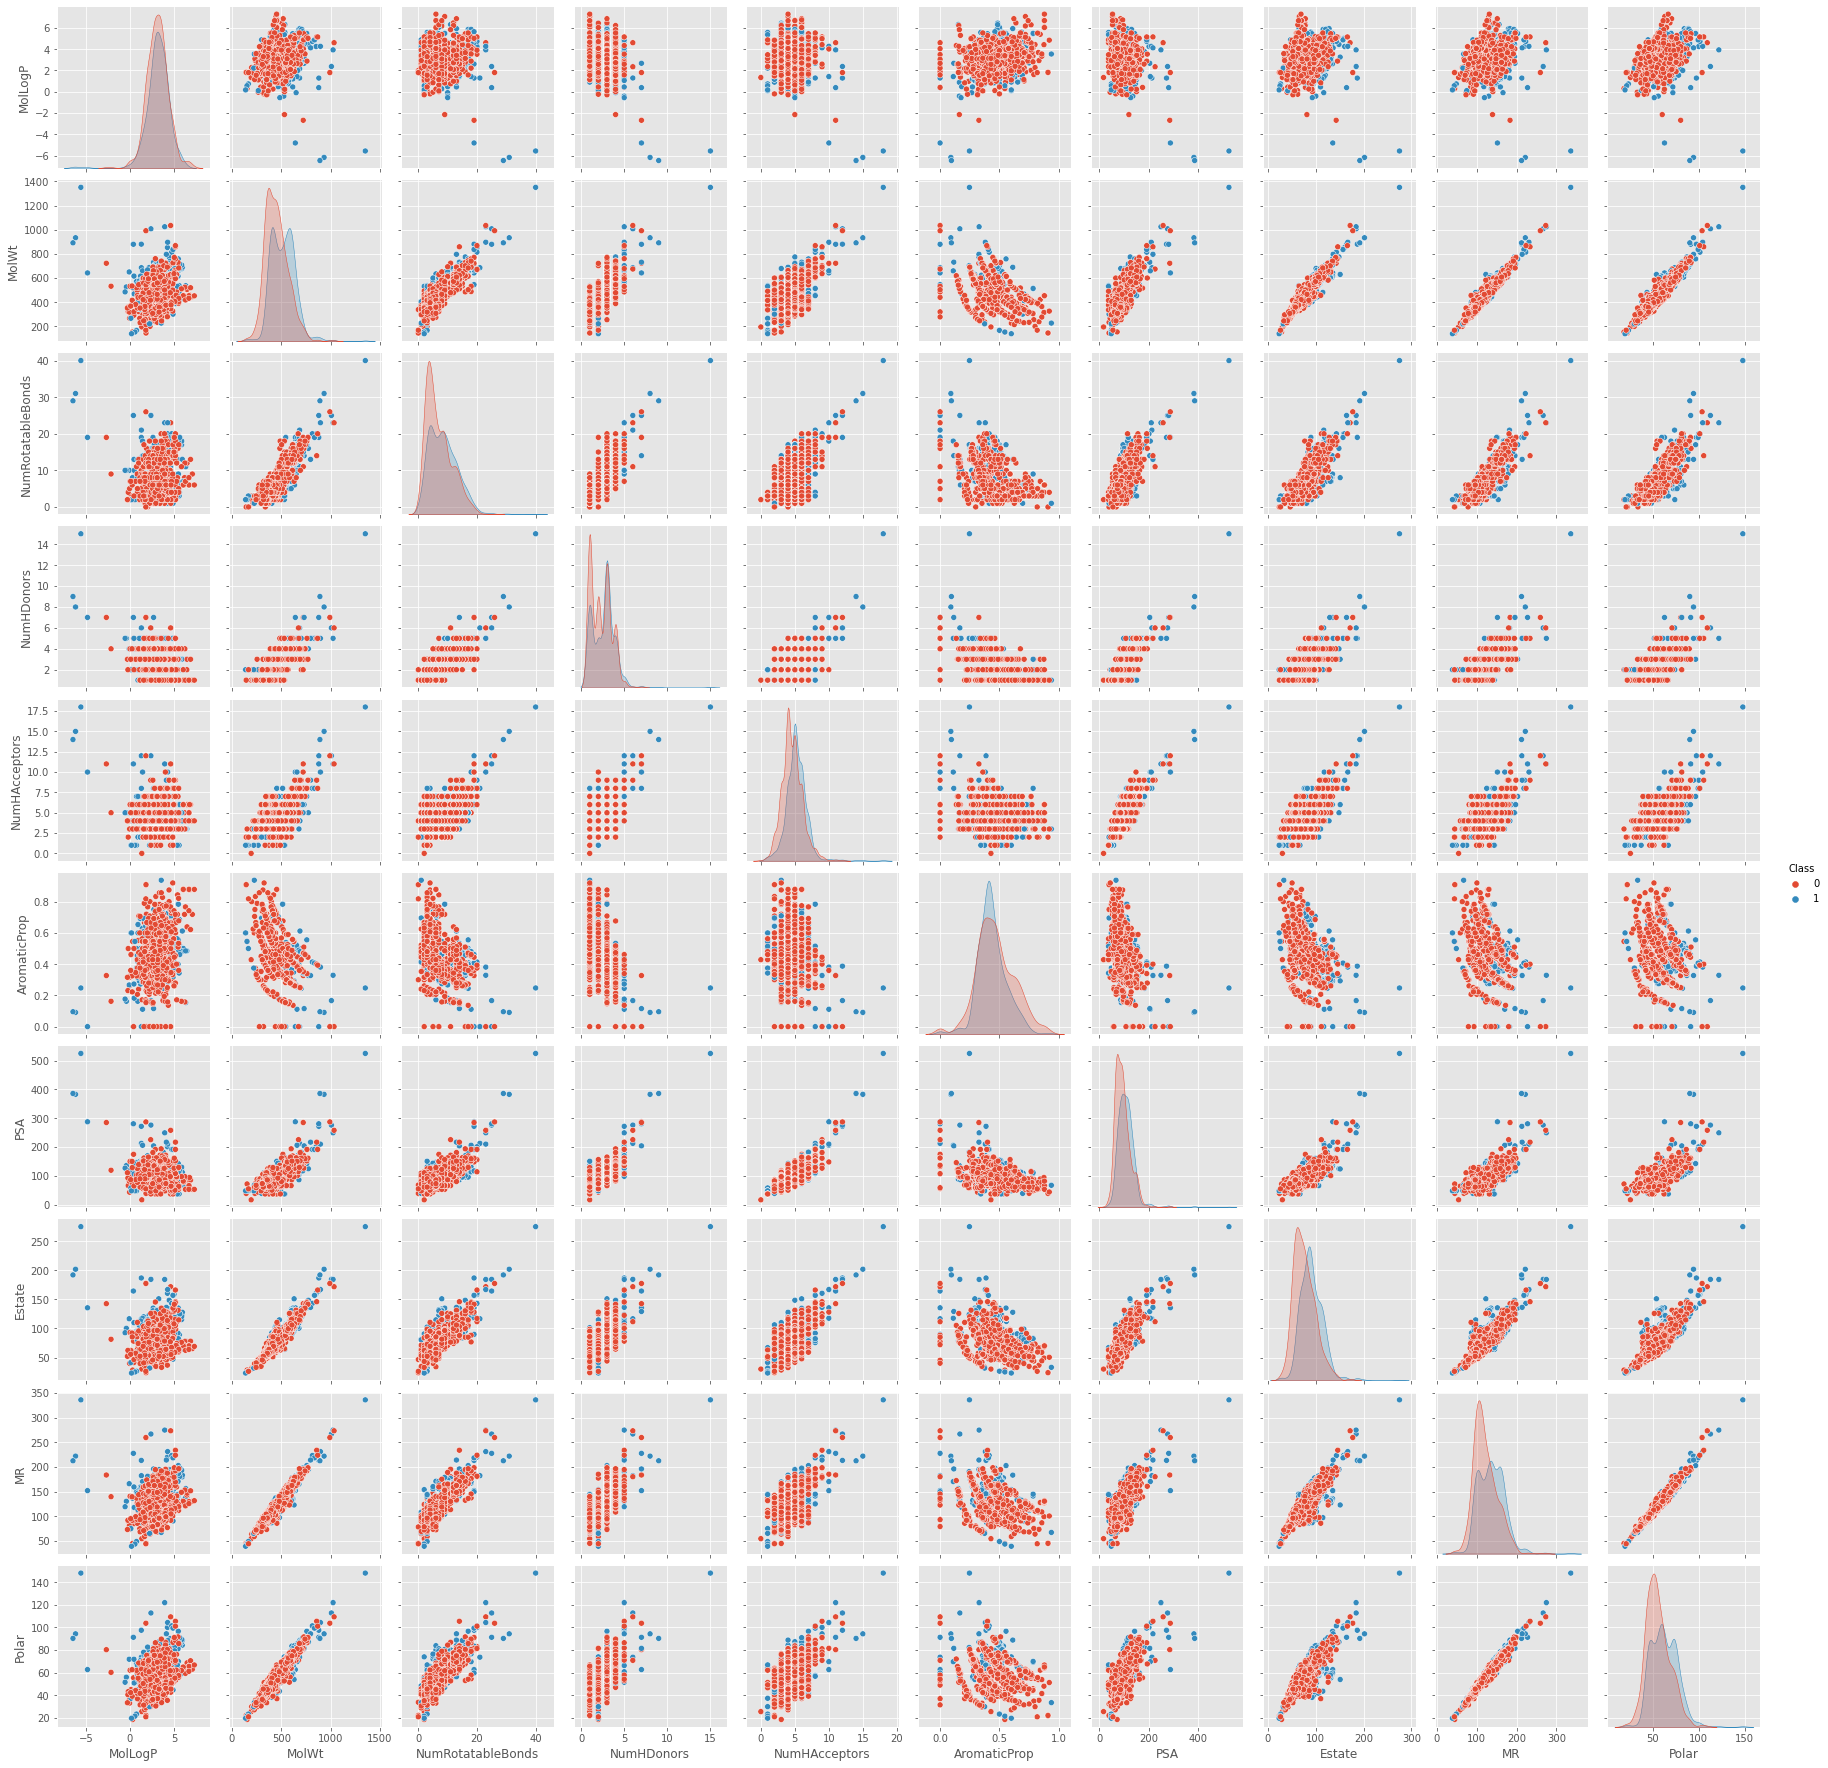

In [612]:
pltp.figure(figsize=(15,7))
sns.pairplot(df_, hue ="Class")

Splitting to Train and Test

80-20

In [617]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
np.random.seed(10)

In [618]:
X_train, X_test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)
Y_Test

,Class,pIC50
131,0,6.229148
820,0,6.906579
625,1,7.397940
332,1,8.154901
153,0,5.494850
...,...,...
1291,0,5.153663
223,1,7.602060
1318,0,5.022276
118,0,6.698970


In [619]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [620]:
Y_test = Y_Test.iloc[:,0]
Yreg_test = Y_Test.iloc[:,1]
Y_train = Y_Train.iloc[:,0]
Yreg_train = Y_Train.iloc[:,1]

In [621]:
X_train.shape, Y_train.shape

((1210, 10), (1210,))

In [622]:
X_test.shape, Y_test.shape

((303, 10), (303,))

Linear Regression

In [623]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [624]:
model = linear_model.LinearRegression()
model.fit(X_train, Yreg_train)

LinearRegression()

In [625]:
Yreg_pred_train = model.predict(X_train)

In [626]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Yreg_train, Yreg_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Yreg_train, Yreg_pred_train))

Coefficients: [ 2.28622037e-02 -4.36990146e-03 -1.56855264e-01 -1.21508583e-01
  8.52402866e-02 -3.18433017e+00 -3.24648271e-04  3.95633829e-02
 -4.09905081e-02  1.49616624e-01]
Intercept: 4.319409655720283
Mean squared error (MSE): 1.23
Coefficient of determination (R^2): 0.33


In [627]:
Yreg_pred_test = model.predict(X_test)
#Yreg_pred_test

In [628]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Yreg_test, Yreg_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Yreg_test, Yreg_pred_test))

Coefficients: [ 2.28622037e-02 -4.36990146e-03 -1.56855264e-01 -1.21508583e-01
  8.52402866e-02 -3.18433017e+00 -3.24648271e-04  3.95633829e-02
 -4.09905081e-02  1.49616624e-01]
Intercept: 4.319409655720283
Mean squared error (MSE): 1.31
Coefficient of determination (R^2): 0.24


In [629]:
print('PIC = ' + 
      ' ' + 
      '%.2f' % model.intercept_ + 
      ' ' + 
      '%.2f LogP' % model.coef_[0] + 
      ' ' + 
     '%.2f WT' % model.coef_[1]+ 
      ' ' + 
      '%.2f Rotatable' % model.coef_[2] + 
      ' ' + 
      '%.2f HD' % model.coef_[3] + 
      ' ' + 
      '%.2f HA' % model.coef_[4] + 
      ' ' + 
     '%.2f AromaticProp' % model.coef_[5] +
      ' ' + 
     '%.2f Polar Surface' % model.coef_[6] +
      ' ' + 
     '%.2f E State' % model.coef_[7] +
      ' ' + 
     '%.2f Molar refractivity' % model.coef_[8] +
      ' ' + 
     '%.2f Polarizability' % model.coef_[9])

PIC =  4.32 0.02 LogP -0.00 WT -0.16 Rotatable -0.12 HD 0.09 HA -3.18 AromaticProp -0.00 Polar Surface 0.04 E State -0.04 Molar refractivity 0.15 Polarizability


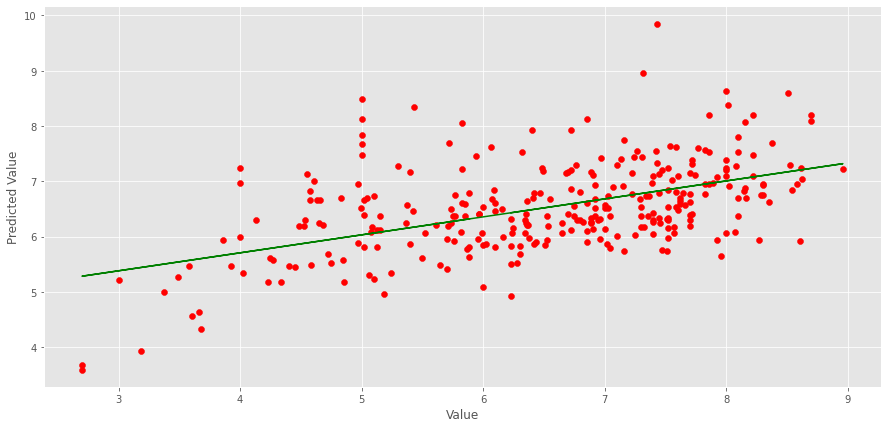

In [635]:
plt.figure(figsize=(15,7))
plt.scatter(Yreg_test, Yreg_pred_test, color = "red")
z = np.polyfit(Yreg_train, Yreg_pred_train, 1)
p = np.poly1d(z)
plt.plot(Yreg_test, p(Yreg_test), color = "green")
plt.xlabel("Value")
plt.ylabel("Predicted Value")
plt.show()

In [636]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#import warnings
from sklearn.exceptions import DataConversionWarning

A Function to Calculate Scores

In [637]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

Logistic Regresssion

In [638]:
from sklearn.linear_model import LogisticRegression

In [639]:
lm = LogisticRegression(solver='liblinear')
lm

LogisticRegression(solver='liblinear')

In [641]:
lm.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [642]:
predict_train_lm = lm.predict(X_train)
predict_test_lm = lm.predict(X_test)

In [643]:
accuracy_score(Y_train, predict_train_lm)

0.6776859504132231

In [644]:
accuracy_score(Y_test, predict_test_lm)

0.6732673267326733

In [645]:
print(confusion_matrix(Y_test, predict_test_lm))
print("\n")
print(classification_report(Y_test, predict_test_lm))

[[129  42]
 [ 57  75]]


              precision    recall  f1-score   support

           0       0.69      0.75      0.72       171
           1       0.64      0.57      0.60       132

    accuracy                           0.67       303
   macro avg       0.67      0.66      0.66       303
weighted avg       0.67      0.67      0.67       303



In [646]:
cross_score_lm = cross_val_score(lm, X, Y1, cv = 10)
print(cross_score_lm)
cross_score_lm.mean()

[0.67763158 0.61842105 0.60526316 0.68211921 0.72847682 0.62913907
 0.70860927 0.62913907 0.55629139 0.66887417]


0.65039647960962

KNN

In [647]:
from sklearn.neighbors import KNeighborsClassifier

In [648]:
scores = {}
scores_list = []
range_K = range(1,11)
for K in range_K:
    KNN = KNeighborsClassifier(n_neighbors = K)
    KNN.fit(X_train_scaled , Y_train)
    predict_train_knn = KNN.predict(X_test_scaled)
    scores[K] = metrics.accuracy_score(Y_test, predict_train_knn)
    scores_list.append(scores[K])
scores_list        

[0.7920792079207921,
 0.7557755775577558,
 0.7887788778877888,
 0.7887788778877888,
 0.7788778877887789,
 0.7821782178217822,
 0.7986798679867987,
 0.801980198019802,
 0.7854785478547854,
 0.7722772277227723]

Text(0, 0.5, 'ACC')

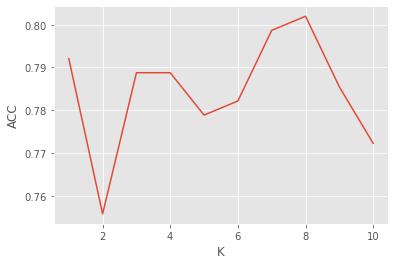

In [649]:
plt.style.use('ggplot')
plt.plot(range_K,scores_list)
plt.xlabel("K")
plt.ylabel("ACC")

In [650]:
KNN = KNeighborsClassifier(n_neighbors = 8)
KNN.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [651]:
predict_train_knn = KNN.predict(X_test_scaled)
score_KNN = metrics.accuracy_score(Y_test, predict_train_knn)
score_KNN

0.801980198019802

In [652]:
print(confusion_matrix(Y_test, predict_train_knn))
print("\n")
print(classification_report(Y_test, predict_train_knn))

[[147  24]
 [ 36  96]]


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       171
           1       0.80      0.73      0.76       132

    accuracy                           0.80       303
   macro avg       0.80      0.79      0.80       303
weighted avg       0.80      0.80      0.80       303



In [653]:
cross_score_KNN = cross_val_score(KNN, X, Y1, cv = 10)
print(cross_score_KNN)
cross_score_KNN.mean()

[0.67105263 0.48026316 0.69078947 0.71523179 0.68211921 0.7218543
 0.7218543  0.68211921 0.59602649 0.73509934]


0.6696409898919484

Decision Tree

In [654]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [801]:
param_grid = {'max_depth':range(3,20), 'max_leaf_nodes':range(5,25)}
Dtree = DecisionTreeClassifier()
clf_tree = GridSearchCV(Dtree, param_grid,verbose=1)
clf_tree.fit(X_train, Y_train)

Fitting 5 folds for each of 340 candidates, totalling 1700 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(5, 25)},
             verbose=1)

In [802]:
clf_tree.best_params_

{'max_depth': 6, 'max_leaf_nodes': 24}

In [803]:
clf_tree.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=24)

In [804]:
Dtree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6, max_leaf_nodes = 24)
Dtree

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=24)

In [797]:
Dtree = Dtree.fit(X_train, Y_train)

In [798]:
predict_train_Dtree = Dtree.predict(X_train)
accuracy_score(Y_train, predict_train_Dtree)

0.7834710743801653

In [799]:
predict_test_Dtree = Dtree.predict(X_test)
accuracy_score(Y_test, predict_test_Dtree)

0.7194719471947195

In [662]:
print(confusion_matrix(Y_test, predict_test_Dtree))
print("\n")
print(classification_report(Y_test, predict_test_Dtree))

[[122  49]
 [ 38  94]]


              precision    recall  f1-score   support

           0       0.76      0.71      0.74       171
           1       0.66      0.71      0.68       132

    accuracy                           0.71       303
   macro avg       0.71      0.71      0.71       303
weighted avg       0.72      0.71      0.71       303



[Text(560.6826923076923, 1009.5428571428572, 'X[7] <= 64.182\nentropy = 0.996\nsamples = 1210\nvalue = [651, 559]'),
 Text(214.61538461538458, 854.2285714285715, 'X[2] <= 1.5\nentropy = 0.632\nsamples = 283\nvalue = [238, 45]'),
 Text(128.76923076923077, 698.9142857142858, 'X[9] <= 43.68\nentropy = 0.992\nsamples = 29\nvalue = [16, 13]'),
 Text(85.84615384615384, 543.6, 'X[5] <= 0.923\nentropy = 0.323\nsamples = 17\nvalue = [16, 1]'),
 Text(42.92307692307692, 388.28571428571433, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(128.76923076923077, 388.28571428571433, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(171.69230769230768, 543.6, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(300.46153846153845, 698.9142857142858, 'X[6] <= 97.19\nentropy = 0.546\nsamples = 254\nvalue = [222, 32]'),
 Text(257.53846153846155, 543.6, 'entropy = 0.446\nsamples = 226\nvalue = [205, 21]'),
 Text(343.38461538461536, 543.6, 'X[9] <= 43.994\nentropy = 0.967\nsamples = 28\nvalue = [1

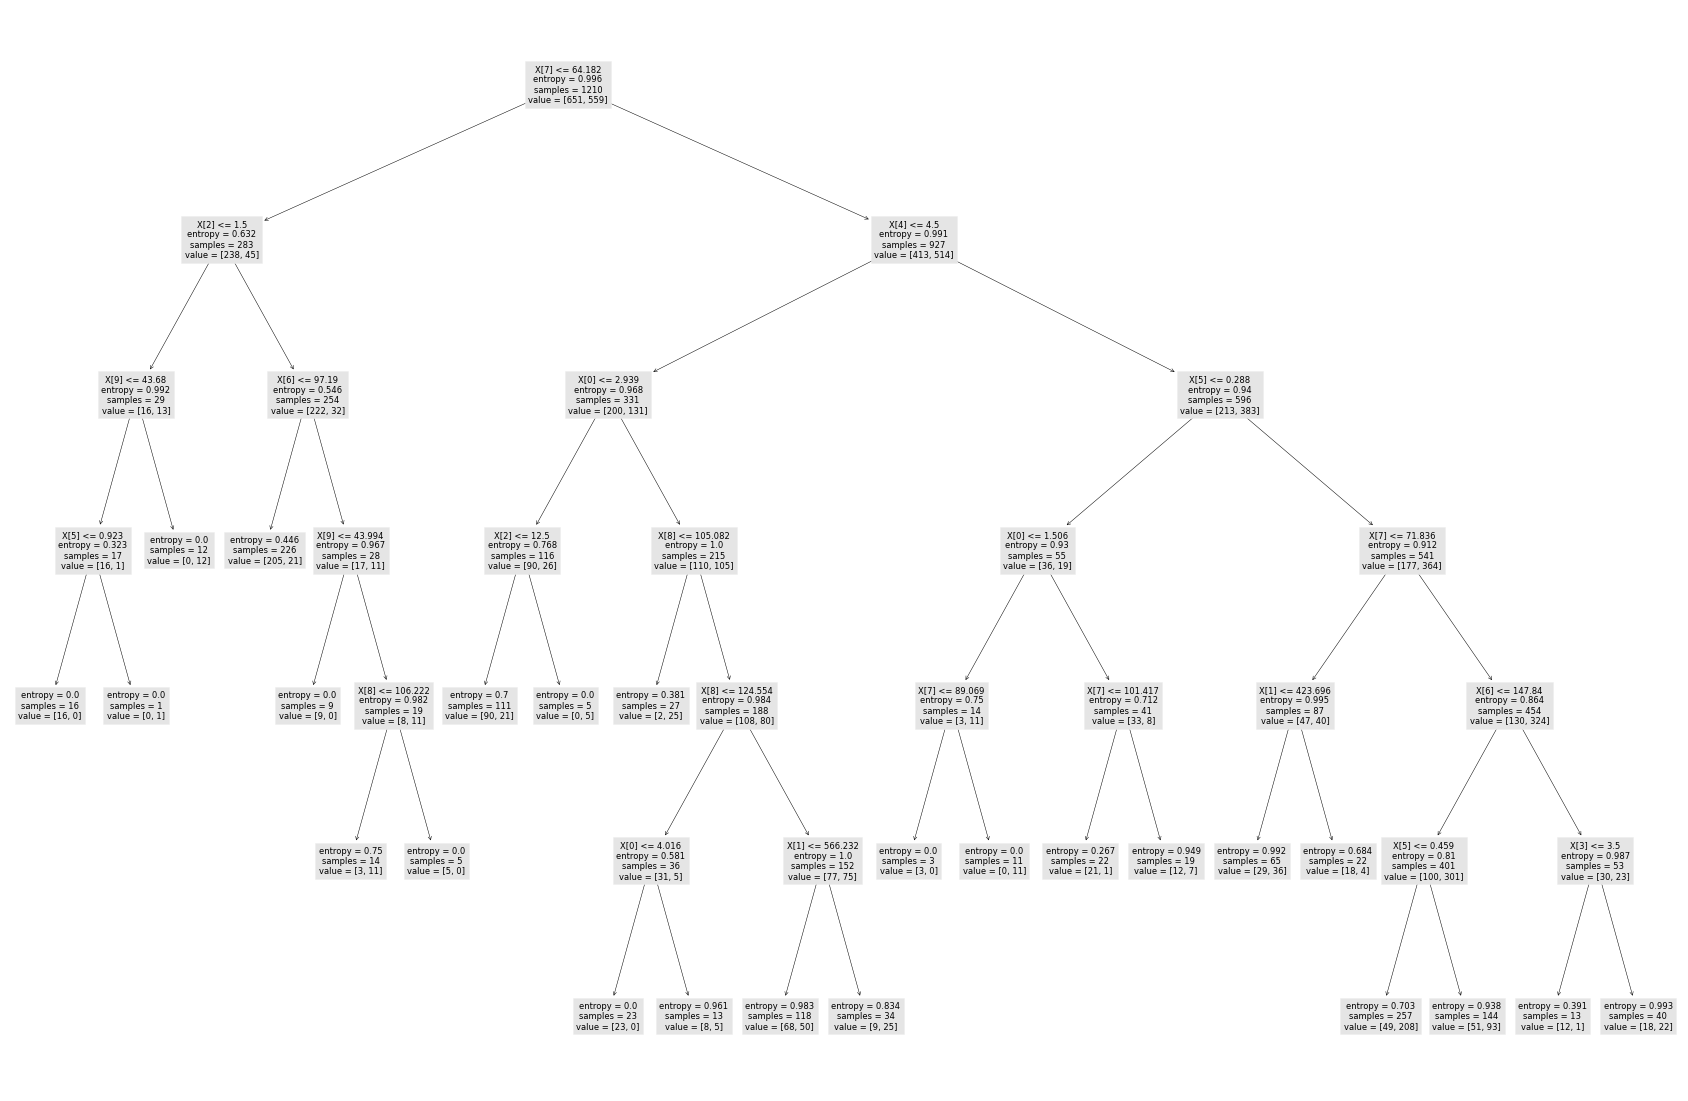

In [665]:
pltp.figure(figsize=(30,20))
tree.plot_tree(Dtree)

In [666]:
cross_score_Dtree = cross_val_score(Dtree, X, Y1, cv = 10)
print(cross_score_Dtree)
cross_score_Dtree.mean()

[0.68421053 0.44078947 0.63157895 0.68874172 0.69536424 0.7615894
 0.72847682 0.70198675 0.71523179 0.73509934]


0.6783069013593586

Random Forest

In [667]:
from sklearn.ensemble import RandomForestClassifier

In [807]:
param_grid_rf = {'max_depth':range(3,20), 'min_samples_leaf':range(5,25)}
rf = RandomForestClassifier()
clf_rf = GridSearchCV(rf, param_grid_rf,verbose=1)
clf_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 340 candidates, totalling 1700 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'min_samples_leaf': range(5, 25)},
             verbose=1)

In [808]:
clf_rf.best_params_

{'max_depth': 15, 'min_samples_leaf': 5}

In [842]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, max_depth=7)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5)

In [843]:
predict_train_rf = rf.predict(X_train)
predict_train_rf 

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [844]:
accuracy_score(Y_train, predict_train_rf)

0.8471074380165289

In [845]:
predict_test_rf = rf.predict(X_test)
accuracy_score(Y_test, predict_test_rf)

0.7458745874587459

In [846]:
print(confusion_matrix(Y_test, predict_test_rf))
print("\n")
print(classification_report(Y_test, predict_test_rf))

[[133  38]
 [ 39  93]]


              precision    recall  f1-score   support

           0       0.77      0.78      0.78       171
           1       0.71      0.70      0.71       132

    accuracy                           0.75       303
   macro avg       0.74      0.74      0.74       303
weighted avg       0.75      0.75      0.75       303



In [847]:
cross_score_rf = cross_val_score(rf, X, Y1, cv = 10)
print(cross_score_rf)
cross_score_rf.mean()

[0.75       0.48684211 0.70394737 0.8013245  0.75496689 0.83443709
 0.82119205 0.8013245  0.66225166 0.72847682]


0.7344762983617985

Neural Network

In [848]:
from sklearn.neural_network import MLPClassifier

In [866]:
mlp = MLPClassifier(hidden_layer_sizes=(10), activation = "relu" )
mlp.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=10)

In [867]:
predict_train_mlp = mlp.predict(X_train_scaled)

In [868]:
accuracy_score(Y_train, predict_train_mlp)

0.715702479338843

In [869]:
predict_test_mlp = mlp.predict(X_test_scaled)

In [870]:
accuracy_score(Y_test, predict_test_mlp)

0.6831683168316832

In [871]:
print(confusion_matrix(Y_test, predict_test_mlp))
print("\n")
print(classification_report(Y_test, predict_test_mlp))

[[113  58]
 [ 38  94]]


              precision    recall  f1-score   support

           0       0.75      0.66      0.70       171
           1       0.62      0.71      0.66       132

    accuracy                           0.68       303
   macro avg       0.68      0.69      0.68       303
weighted avg       0.69      0.68      0.68       303



SVM

In [872]:
from sklearn.svm import SVC

In [873]:
param_grid = {'C':[0.001,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
svc = SVC()
clf_svc = GridSearchCV(svc, param_grid,verbose=1)
clf_svc.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [874]:
clf_svc.best_params_

{'C': 1, 'gamma': 1}

In [890]:
svc = SVC(C = 1, gamma = 1, kernel = "rbf" )
svc.fit(X_train_scaled, Y_train)

SVC(C=1, gamma=1)

In [891]:
predict_train_svc = svc.predict(X_train_scaled)

In [892]:
accuracy_score(Y_train, predict_train_svc)

0.8917355371900827

In [893]:
predict_test_svc = svc.predict(X_test_scaled)

In [894]:
accuracy_score(Y_test, predict_test_svc)

0.801980198019802

In [895]:
print(confusion_matrix(Y_test, predict_test_svc))
print("\n")
print(classification_report(Y_test, predict_test_svc))

[[148  23]
 [ 37  95]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       171
           1       0.81      0.72      0.76       132

    accuracy                           0.80       303
   macro avg       0.80      0.79      0.80       303
weighted avg       0.80      0.80      0.80       303



Adaboost

In [896]:
from sklearn.ensemble import AdaBoostClassifier

In [897]:
ada = AdaBoostClassifier(n_estimators = 100, base_estimator = None, learning_rate = 1)
ada.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [898]:
predict_train_ada = ada.predict(X_train)

In [899]:
accuracy_score(Y_train, predict_train_ada)

0.8008264462809918

In [900]:
predict_test_ada = ada.predict(X_test)

In [901]:
accuracy_score(Y_test, predict_test_ada)

0.7194719471947195

In [902]:
print(confusion_matrix(Y_test, predict_test_ada))
print("\n")
print(classification_report(Y_test, predict_test_ada))

[[125  46]
 [ 39  93]]


              precision    recall  f1-score   support

           0       0.76      0.73      0.75       171
           1       0.67      0.70      0.69       132

    accuracy                           0.72       303
   macro avg       0.72      0.72      0.72       303
weighted avg       0.72      0.72      0.72       303



In [903]:
cross_score_ada = cross_val_score(ada, X, Y1, cv = 10)
print(cross_score_ada)
cross_score_ada.mean()

[0.65789474 0.44078947 0.66447368 0.78145695 0.67549669 0.81456954
 0.74834437 0.72847682 0.62913907 0.68211921]


0.6822760543743465

XGBoost


In [904]:
from xgboost import XGBClassifier

In [905]:
xgb = XGBClassifier(max_depth = 1, subsample = 0.9)
eval_ = [(X_test, Y_test)]
xgb.fit(X_train, Y_train, early_stopping_rounds = 10, eval_set = eval_)

[09:27:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66984
[1]	validation_0-logloss:0.65335
[2]	validation_0-logloss:0.64625
[3]	validation_0-logloss:0.63932
[4]	validation_0-logloss:0.63446
[5]	validation_0-logloss:0.63197
[6]	validation_0-logloss:0.63091
[7]	validation_0-logloss:0.62670
[8]	validation_0-logloss:0.62676
[9]	validation_0-logloss:0.62152
[10]	validation_0-logloss:0.62119
[11]	validation_0-logloss:0.61885
[12]	validation_0-logloss:0.61781
[13]	validation_0-logloss:0.61689
[14]	validation_0-logloss:0.61615
[15]	validation_0-logloss:0.61338
[16]	validation_0-logloss:0.60974
[17]	validation_0-logloss:0.61014
[18]	validation_0-logloss:0.60895
[19]	validation_0-logloss:0.60889
[20]	validation_0-logloss:0.60886
[21]	validation_0-logloss:0.60934
[22]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [906]:
predict_train_xgb = xgb.predict(X_train)
predict_test_xgb = xgb.predict(X_test)

In [907]:
accuracy_score(Y_train, predict_train_xgb)

0.7694214876033058

In [908]:
accuracy_score(Y_test, predict_test_xgb)

0.7227722772277227

In [909]:
print(confusion_matrix(Y_test, predict_test_xgb))
print("\n")
print(classification_report(Y_test, predict_test_xgb))

[[127  44]
 [ 40  92]]


              precision    recall  f1-score   support

           0       0.76      0.74      0.75       171
           1       0.68      0.70      0.69       132

    accuracy                           0.72       303
   macro avg       0.72      0.72      0.72       303
weighted avg       0.72      0.72      0.72       303



In [910]:
from xgboost import plot_importance
from matplotlib import pyplot

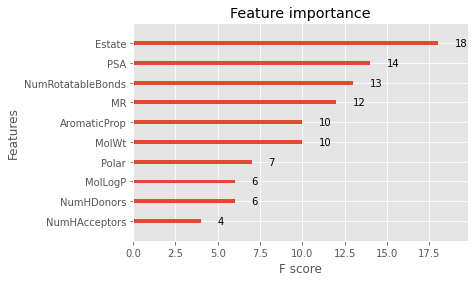

In [911]:
plot_importance(xgb)
pyplot.show()

Bagging

In [912]:
from sklearn.ensemble import BaggingClassifier

In [933]:
bg = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples = 5, max_features = 5, n_estimators =100)
bg.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=5,
                  max_samples=5, n_estimators=100)

In [934]:
predict_train_bg = bg.predict(X_train)
predict_test_bg = bg.predict(X_test)

In [935]:
accuracy_score(Y_train, predict_train_bg)

0.6355371900826446

In [936]:
accuracy_score(Y_test, predict_test_bg)

0.6138613861386139

In [937]:
print(confusion_matrix(Y_test, predict_test_bg))
print("\n")
print(classification_report(Y_test, predict_test_bg))

[[127  44]
 [ 73  59]]


              precision    recall  f1-score   support

           0       0.64      0.74      0.68       171
           1       0.57      0.45      0.50       132

    accuracy                           0.61       303
   macro avg       0.60      0.59      0.59       303
weighted avg       0.61      0.61      0.61       303



Ensemble(Voting)

In [938]:
from sklearn.ensemble import VotingClassifier

In [943]:
vc = VotingClassifier(estimators = [("logistic",lm), ("tree",Dtree)], voting = "hard")
vc.fit(X_train, Y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(solver='liblinear')),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=6,
                                                     max_leaf_nodes=24))])

In [944]:
predict_train_vc = vc.predict(X_train)
predict_test_vc = vc.predict(X_test)

In [945]:
accuracy_score(Y_train, predict_train_vc)

0.7090909090909091

In [946]:
accuracy_score(Y_test, predict_test_vc)

0.7029702970297029

In [947]:
print(confusion_matrix(Y_test, predict_test_vc))
print("\n")
print(classification_report(Y_test, predict_test_vc))

[[147  24]
 [ 66  66]]


              precision    recall  f1-score   support

           0       0.69      0.86      0.77       171
           1       0.73      0.50      0.59       132

    accuracy                           0.70       303
   macro avg       0.71      0.68      0.68       303
weighted avg       0.71      0.70      0.69       303



Compare Accuracy

In [948]:
import warnings
warnings.filterwarnings("ignore")

In [949]:
print("Logistic", get_score(lm, X_train, X_test, Y_train, Y_test))
print("KNN", get_score(KNN, X_train, X_test, Y_train, Y_test))
print("Decision Tree ", get_score(Dtree, X_train, X_test, Y_train, Y_test))
print("Random Forest", get_score(rf, X_train, X_test, Y_train, Y_test))
print("SVM", get_score(svc, X_train_scaled, X_test_scaled, Y_train, Y_test))
print("Neural Network", get_score(mlp, X_train_scaled, X_test_scaled, Y_train, Y_test))
print("Adaboost", get_score(ada, X_train, X_test, Y_train, Y_test))
print("XGboost", get_score(xgb, X_train, X_test, Y_train, Y_test))
print("bagging", get_score(bg, X_train, X_test, Y_train, Y_test))
print("Voting Ensemble", get_score(vc, X_train, X_test, Y_train, Y_test))

Logistic 0.6732673267326733
KNN 0.6798679867986799
Decision Tree  0.7128712871287128
Random Forest 0.7524752475247525
SVM 0.801980198019802
Neural Network 0.6996699669966997
Adaboost 0.7194719471947195
[09:32:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost 0.7227722772277227
bagging 0.6204620462046204
Voting Ensemble 0.7029702970297029


SVM gain the best accuracy